
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from matplotlib import cm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
#Machinig learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

In [2]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# 2 Dimensiones

Caso Bivariante

\begin{equation}
f(x, y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp \left( -\frac{1}{2(1-\rho^2)} \left(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2}-\frac{2\rho x y}{(\sigma_x \sigma_y)} \right) \right) 
\end{equation}


$\rho$ coeficiente de correlación, media es $(0, 0)$


La matriz de covarianzas viene dada por:

\begin{equation}
\Sigma =  
\begin{bmatrix}
\sigma_x^2 & \rho \sigma_x \sigma_y  \\
\rho \sigma_x \sigma_y & \sigma_y^2\\
\end{bmatrix}
\end{equation}

Otra forma de escribirla puede ser como sigue



### El caso más general viene dado por:

En el caso más general tenemos que :
\begin{equation}
f_X(x_1,x_2, ... x_n) = \frac{1}{2\pi^{n/2}|\Sigma|^{1/2}} \exp\left( -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
\end{equation}


$|\Sigma|$ es el determinante de la matrix de covarianza, 







# Dataset 

|Y         | X_1       |X_2       |
|----------|----------|-----------|
|$Y^{1}$ | $X_1^{1}$|  $X_2^{1}$| 
|$Y^{2}$ | $X_1^{2}$|$X_2^{1}$| 
|.         | .        |.        |
|.         | .        |.        |
|.         | .        |.        |
|$Y^{m}$ | $X_1^{m}$  |$X_2^{1}$| 



In [3]:
def data( mu=[1,1], mu1=[-2,2], cov=[[1.0, 0.0], [0.0, 1.0]] , cov1= [[1.0, -0.5], [-0.5, 1.0]]   ):# Caso mas visible  
  rv = multivariate_normal(mu, cov)
  rv1 = multivariate_normal(mu1, cov1)
  return rv, rv1

def sample(N1= 1000, N2 = 100, r = 0.2):
  X_t = np.concatenate([rv.rvs(N1, random_state = r  ), rv1.rvs(N2,random_state = r)]) # Todos los datos en la misma distribución, 
  y   = np.concatenate([np.zeros(N1), np.ones(N2) ]  )
  return X_t, y


In [4]:
def graph_gaussian_contour(x, y, pos, rv,  rv2):
  fig = plt.figure(figsize = (12,6))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  surf1 = ax.plot_surface(x,y, rv.pdf(pos) + rv1.pdf(pos), cmap = cm.coolwarm,
                        linewidth = 0, antialiased = False)
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  ax.set_zlabel("$PDF(X_1,X_2)$")
  #=============================================================
  ax = fig.add_subplot(1, 2, 2)
  cs1 = ax.contourf(x, y, rv.pdf(pos) + rv1.pdf(pos)  )
  #cs2 = ax.contourf(x1, y1, rv1.pdf(pos1) )
  ax.set_xlabel("$X_1$")
  ax.set_ylabel("$X_2$")
  #ax.set_xlim(-2.5,2.5)
  #ax.set_ylim(-2.5,2.5)
  cbar = fig.colorbar(cs1)
# Histograma de los datos sinteticos a estudiar


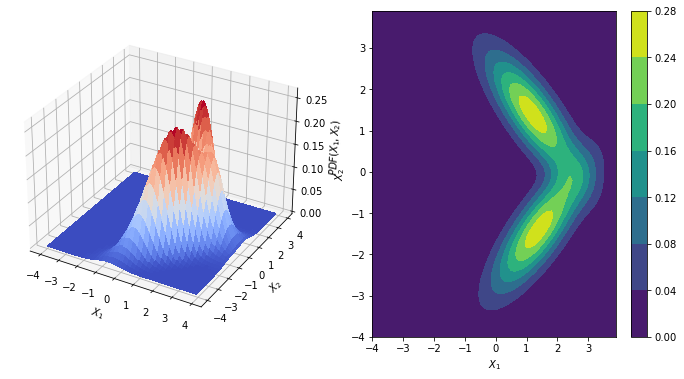

In [5]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.8], [0.8, 1.0]])
#Mesh para la grafica en 3D
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
graph_gaussian_contour(x, y, pos, rv, rv1)

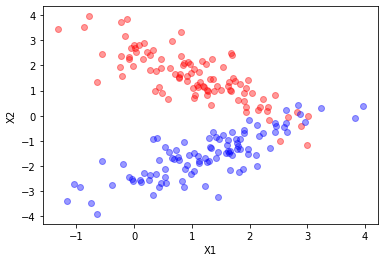

In [6]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 100, N2 = 100, r = 10)

plt.plot(X_t[y==0][:,0],X_t[y==0][:,1],"ro", alpha=0.4)
plt.plot(X_t[y==1][:,0],X_t[y==1][:,1],"bo", alpha=0.4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Curvas de aprendizaje


Permite definir las metricas del modelo, define que también es sepración realizada por el estimador. Permite entender cuando se presenta sobreajuste y bajoajuste en un modelo de machining learning.

Su construccion puede ser realizada como sigue:

1. El datasets se divide K veces en entrenamiento y validación.
```
x_t_index = [0, 1, 2, 3 4, 5, 6, 7, 8, 9]
```

|div|train_index     |test_index |
|---|----------------|-----------|
| 1 |[9 8 6 7 0 4 2] |[3 1 5]|
| 2 |[0 7 9 3 2 1 4] | [5 8 6]|
| 3 |[8 6 5 2 9 7 3] | [0 1 4]|
| 4 |[5 9 4 6 3 0 2] |[7 8 1]|
|k=5|[3 5 8 1 7 6 0] | [9 2 4]|


2. Se construyen subconjunto del dataset de entrenamiento   para entrenar el estimador.

|split| train_index(div 1)|train_index(div 2)| ... |execution|
|-----|--------------------|-----------------|-----|---------|    
| 1   |[9, 8]            | [0, 7]            | ... |    i    |
| 2   |[9, 8, 6]         | [0, 7, 9]         | ... | i    |
| 3   |[9,8,6, 7, 0]     |  [0, 7, 9,3]      | ... | i    |
| 4   |[9,8,6, 7, 0, 4]  |  [0, 7, 9,3, 2]   | ... | i    |
| 5   |[9, 8, 6]         |[0, 7, 9,3, 2,1]   | ... | i    |
| 6   |[9,8,6, 7, 0, 4,2]| [0, 7, 9,3, 2,1,4]| ... | i    |




3. Se computan los scores para los datos de entrenamiento y validación.

4. Se promedian los scores de los  datos de entrenamiento y validación 


# Overfitting:

Modelo con una complejidad alta, por ejemplo querer ajutar una funcion lineal con un polinomio de grado superior. En este caso decimos que el sistema se esta aprendiendo los datos de memoria.

1. Para las covarianzas mostradas, realiza las siguientes pruebas, ¿la Separacion de los datos mejora con el aumento de datos?

2. El hiperparametro gamma, por ahora, permitira definir la complejidad de la frontera. Que pasa si se disminuye el valor de gamma?



In [7]:
q = X_t[0:10]
cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state=None)
for train_index,test_index in cv.split(q):
  print(train_index,test_index)

[5 9 1 0 7 6 4] [8 3 2]
[9 2 1 7 6 3 0] [8 4 5]
[6 4 3 0 5 2 7] [1 9 8]
[6 5 0 3 8 9 2] [7 1 4]
[3 0 6 4 1 7 2] [8 5 9]


In [8]:
len(X_t)

200

Training error:0.979
Test error: 0.896


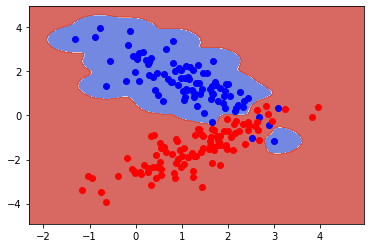

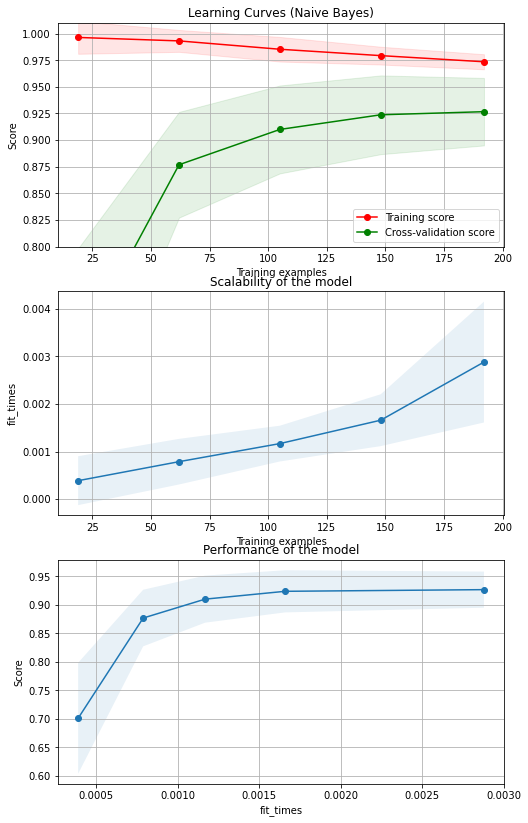

In [9]:
rv, rv1 = data( mu=[1.2,1.4], mu1=[1.4,-1.4], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 120, N2 = 120, r = 10)
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,  
                                                    random_state=1)
clf = SVC(gamma = 10.0)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )

fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(clf, title, X_t, y, axes=axes[0:,], ylim=(0.8, 1.01), cv=cv, n_jobs=4)
plt.show()

# Underfitting 
No se obtiene la naturaleza subyancente de los datos, el modelo ajustado presentan un error en la estimación de la frontera desfasada respecto a la frontera Bayesiana

Training error:0.547
Test error: 0.375


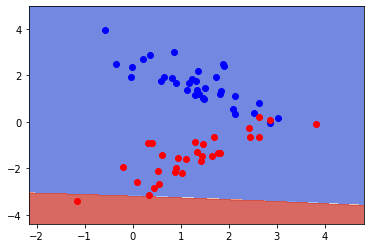

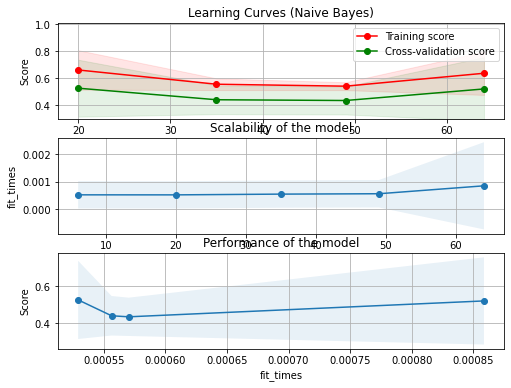

In [10]:
#variar la cantida de datos


rv, rv1 = data( mu=[1.4,1.4], mu1=[1.4,-1.4], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.8], [0.8, 1.0]])
X_t, y = sample(N1 = 40, N2 = 40, r = 10)


X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,  
                                                    random_state=1)
clf = SVC(gamma = 0.001)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )

fig, axes = plt.subplots(3, 1, figsize=(8, 6))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(clf, title, X_t, y, axes=axes, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.show()

# Underfiting

Training error:0.875
Test error: 0.786


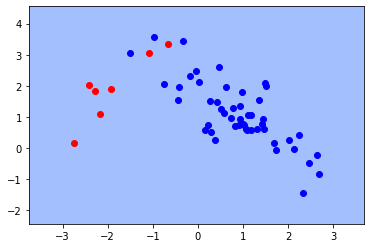

In [11]:
rv, rv1 = data( mu=[1,1], mu1=[-2,2], 
     cov=[[1.0, -0.8], [-0.8, 1.0]] , 
     cov1= [[1.0, 0.5], [0.5, 1.0]])

X_t, y = sample(N1 = 60, N2 = 10, r = 10)

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2,  
                                                    random_state=1)
clf = SVC(gamma = 0.001)
clf.fit(X_train, y_train)
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_train[y_train==0][:,0],X_train[y_train==0][:,1],"bo", alpha=1)
plt.plot(X_train[y_train==1][:,0],X_train[y_train==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X_train, y_train):.3f}")
print(f"Test error: {clf.score(X_test, y_test):.3f}" )


# Model Selection and Train/Validation/Test Sets
[1] Reference http://cs229.stanford.edu/syllabus.html


Just because a learning algorithm fits a training set well, that does not mean it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. The error of your hypothesis as measured on the data set with which you trained the parameters will be lower than the error on any other data set. 

Given many models with different polynomial degrees, we can use a systematic approach to identify the 'best' function. In order to choose the model of your hypothesis, you can test each degree of polynomial and look at the error result.

One way to break down our dataset into the three sets is:

Training set: 60%

Cross validation set: 20%

Test set: 20%

We can now calculate three separate error values for the three different sets using the following method:

1. Optimize the parameters in Θ using the training set for each polynomial degree.

2. Find the polynomial degree d with the least error using the cross validation set.

3. Estimate the generalization error using the test set with J_{test}

This way, the degree of the polynomial d has not been trained using the test set.


Tarea :

3.1 Para esta situación tomar el 20% como datos para realizar la validacion cruzada y el 80% para realizar el entrenamiento. Construir una curva del score en función del parametro gamma del clasificador que se esta empleando. ¿Cual presenta una mejor solucion al problema?.  

3.2 Construir las curvas de aprendizaje estadístico para el modelo descrito, comprobar que la solución es similar a la esperada a través de sklean.
a
3.3 Elegir, los párametros adecuados para los centros de medias y las matrices de covarianzas y mostrar Mostrar un ejemplo de Overfitting underfitting con el algoritmo generados construido por ustedes.  Analizar los resultados.

